#### Task (class ‘A’):

    Perform task 1.1 using thresholds yielding the following density values: 1%, 5%,
    10%, 20%, 30%, 50%.

#### Importing the routine libraries

In [2]:
import sys
sys.path.insert(0, '../Lib')
from homeworkLib import EEGGraph
import connectivipy as cp
import networkx as nx
import pandas as pd
import pickle
import re

In [3]:
# creating 12 objects for our analysis
#   EO_i -> object representing the data recorded during eyes-opened resting state, and i representing the desired density value.
#   EC_i -> object representing the data recorded during eyes-closed resting state, and i representing the desired density value.
EO_1 = EEGGraph("../../Data/S003R01.edf")
EO_5 = EEGGraph("../../Data/S003R01.edf")
EO_10 = EEGGraph("../../Data/S003R01.edf")
EO_20 = EEGGraph("../../Data/S003R01.edf")
EO_30 = EEGGraph("../../Data/S003R01.edf")
EO_50 = EEGGraph("../../Data/S003R01.edf")

EC_1 = EEGGraph("../../Data/S003R02.edf")
EC_5 = EEGGraph("../../Data/S003R02.edf")
EC_10 = EEGGraph("../../Data/S003R02.edf")
EC_20 = EEGGraph("../../Data/S003R02.edf")
EC_30 = EEGGraph("../../Data/S003R02.edf")
EC_50 = EEGGraph("../../Data/S003R02.edf")

#Reading in the channel locations
locations = {re.sub('[^\w]',"",x[1][1]):(x[1]['x'], x[1]['y']) for x in pd.read_csv("../../Data/channel_locations.txt", 
                                                                                 sep = "\s+").iterrows()}

### Estimation of the functional brain connectivity using Direct Transfer Function (DTF)

#### Eyes-opened case

In [4]:
dtf_matrix_EO_1 = EO_1.get_connectivity_matrix_DTF()
dtf_matrix_EO_5 = EO_5.get_connectivity_matrix_DTF()
dtf_matrix_EO_10 = EO_10.get_connectivity_matrix_DTF()
dtf_matrix_EO_20 = EO_20.get_connectivity_matrix_DTF()
dtf_matrix_EO_30 = EO_30.get_connectivity_matrix_DTF()
dtf_matrix_EO_50 = EO_50.get_connectivity_matrix_DTF()

#### Eyes-closed case

In [5]:
dtf_matrix_EC_1 = EC_1.get_connectivity_matrix_DTF()
dtf_matrix_EC_5 = EC_5.get_connectivity_matrix_DTF()
dtf_matrix_EC_10 = EC_10.get_connectivity_matrix_DTF()
dtf_matrix_EC_20 = EC_20.get_connectivity_matrix_DTF()
dtf_matrix_EC_30 = EC_30.get_connectivity_matrix_DTF()
dtf_matrix_EC_50 = EC_50.get_connectivity_matrix_DTF()

### Select one relevant frequency value using spectral analysis

In [6]:
relevant_frequency = 3

### Apply a threshold to get a binary connectivity matrix with the desired (i) network density

#### Eyes-opened

In [7]:
dtf_bin_adj_matrix_EO_1, dtf_Graph_EO_1, threshold1 = EO_1.get_binary_adjacency_matrix(dtf_matrix_EO_1, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 1)
dtf_bin_adj_matrix_EO_5, dtf_Graph_EO_5, threshold5 = EO_5.get_binary_adjacency_matrix(dtf_matrix_EO_5, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 5)
dtf_bin_adj_matrix_EO_10, dtf_Graph_EO_10, threshold10 = EO_10.get_binary_adjacency_matrix(dtf_matrix_EO_10, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 10)
dtf_bin_adj_matrix_EO_20, dtf_Graph_EO_20, threshold20 = EO_20.get_binary_adjacency_matrix(dtf_matrix_EO_20, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
dtf_bin_adj_matrix_EO_30, dtf_Graph_EO_30, threshold30 = EO_30.get_binary_adjacency_matrix(dtf_matrix_EO_30, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 30)
dtf_bin_adj_matrix_EO_50, dtf_Graph_EO_50, threshold50 = EO_50.get_binary_adjacency_matrix(dtf_matrix_EO_50, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 50)

print("Threshold: "+str(threshold1)+", Density: "+str(int(nx.density(dtf_Graph_EO_1)*100))+"%")
print("Threshold: "+str(threshold5)+", Density: "+str(int(nx.density(dtf_Graph_EO_5)*100))+"%")
print("Threshold: "+str(threshold10)+", Density: "+str(int(nx.density(dtf_Graph_EO_10)*100))+"%")
print("Threshold: "+str(threshold20)+", Density: "+str(int(nx.density(dtf_Graph_EO_20)*100))+"%")
print("Threshold: "+str(threshold30)+", Density: "+str(int(nx.density(dtf_Graph_EO_30)*100))+"%")
print("Threshold: "+str(threshold50)+", Density: "+str(int(nx.density(dtf_Graph_EO_50)*100))+"%")

Threshold: 0.334, Density: 1%
Threshold: 0.246, Density: 5%
Threshold: 0.181, Density: 10%
Threshold: 0.134, Density: 20%
Threshold: 0.105, Density: 30%
Threshold: 0.065, Density: 50%


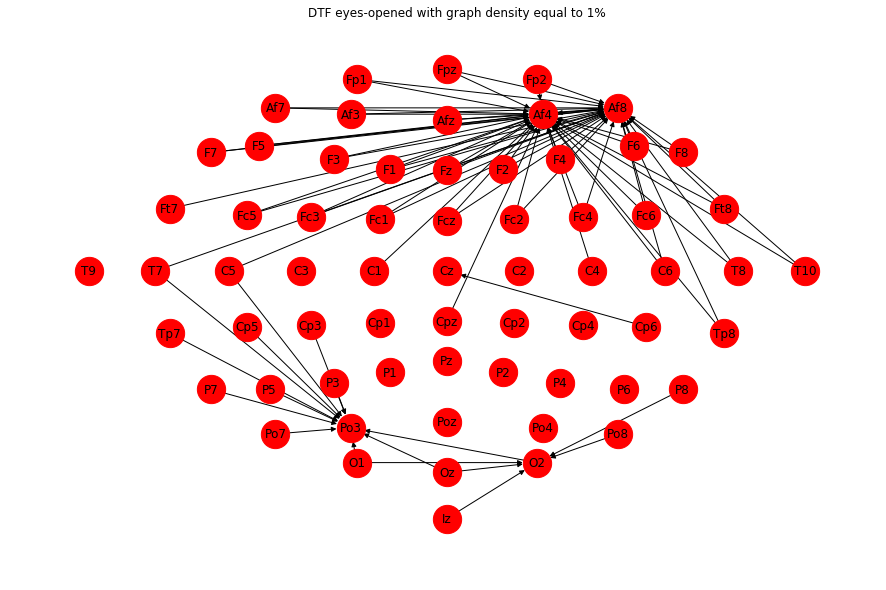

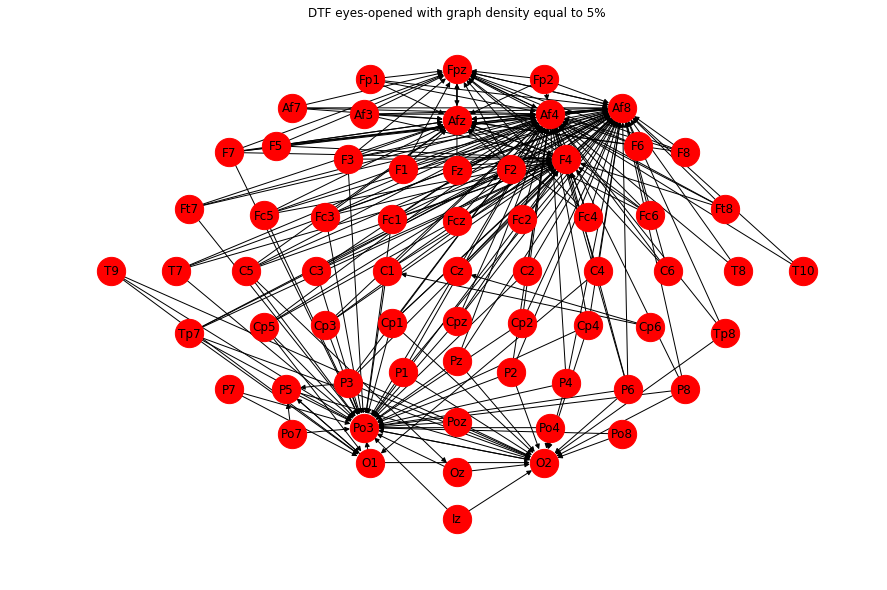

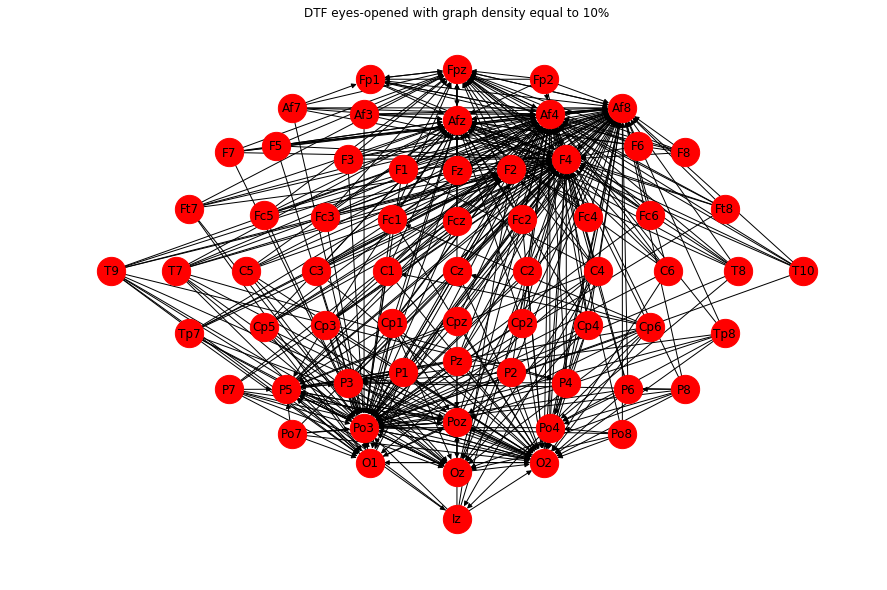

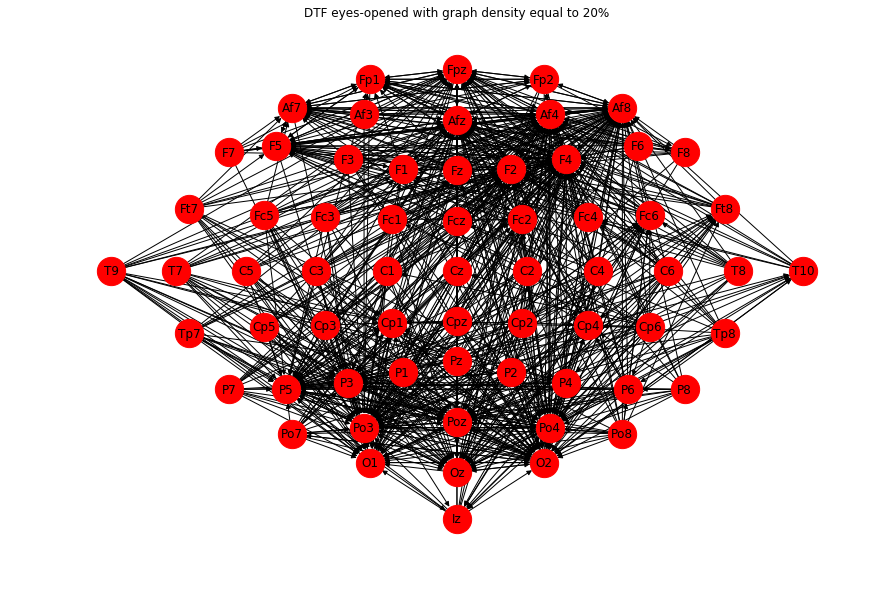

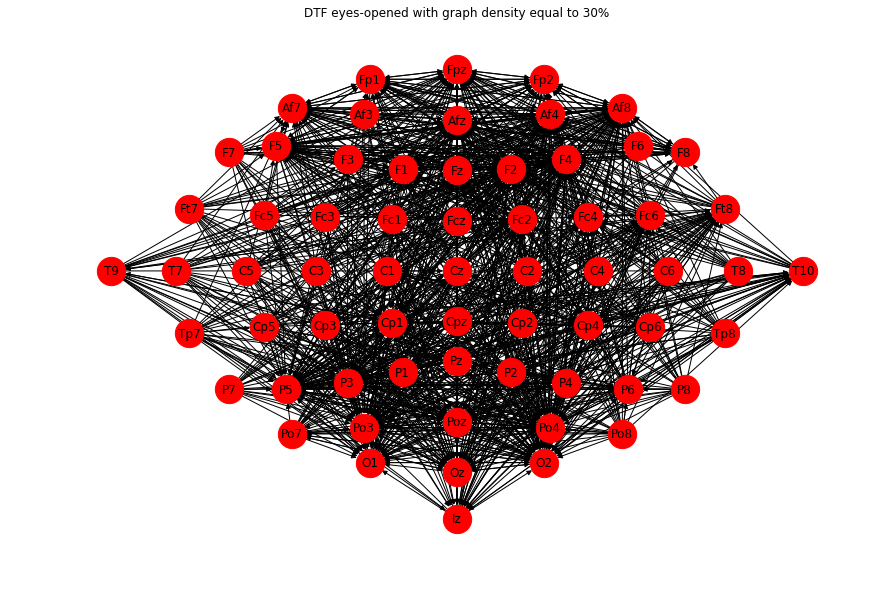

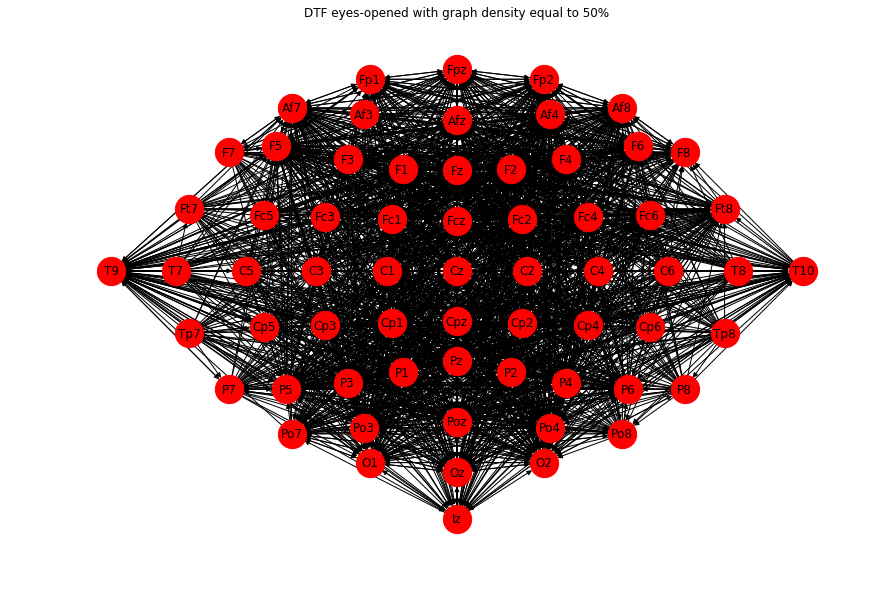

In [8]:
# Create a graphical representation of the binary adjacency matrices
EO_1.show_graph(dtf_Graph_EO_1, "DTF eyes-opened with graph density equal to 1%",
                locations,
                saving_path = "../../Images/Q1_3_DTF eyes-opened Density 1", save = True)
EO_5.show_graph(dtf_Graph_EO_5, "DTF eyes-opened with graph density equal to 5%",
                locations,
                saving_path = "../../Images/Q1_3_DTF eyes-opened Density 5", save = True)
EO_10.show_graph(dtf_Graph_EO_10, "DTF eyes-opened with graph density equal to 10%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-opened Density 10", save = True)
EO_20.show_graph(dtf_Graph_EO_20, "DTF eyes-opened with graph density equal to 20%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-opened Density 20", save = True)
EO_30.show_graph(dtf_Graph_EO_30, "DTF eyes-opened with graph density equal to 30%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-opened Density 30", save = True)
EO_50.show_graph(dtf_Graph_EO_50, "DTF eyes-opened with graph density equal to 50%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-opened Density 50", save = True)

##### Eyes-closed

In [9]:
dtf_bin_adj_matrix_EC_1, dtf_Graph_EC_1, threshold1_C = EC_1.get_binary_adjacency_matrix(dtf_matrix_EC_1, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 1)
dtf_bin_adj_matrix_EC_5, dtf_Graph_EC_5, threshold5_C = EC_5.get_binary_adjacency_matrix(dtf_matrix_EC_5, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 5)
dtf_bin_adj_matrix_EC_10, dtf_Graph_EC_10, threshold10_C = EC_10.get_binary_adjacency_matrix(dtf_matrix_EC_10, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 10)
dtf_bin_adj_matrix_EC_20, dtf_Graph_EC_20, threshold20_C = EC_20.get_binary_adjacency_matrix(dtf_matrix_EC_20, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
dtf_bin_adj_matrix_EC_30, dtf_Graph_EC_30, threshold30_C = EC_30.get_binary_adjacency_matrix(dtf_matrix_EC_30, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 30)
dtf_bin_adj_matrix_EC_50, dtf_Graph_EC_50, threshold50_C = EC_50.get_binary_adjacency_matrix(dtf_matrix_EC_50, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 50)

print("Threshold: "+str(threshold1_C)+", Density: "+str(int(nx.density(dtf_Graph_EC_1)*100))+"%")
print("Threshold: "+str(threshold5_C)+", Density: "+str(int(nx.density(dtf_Graph_EC_5)*100))+"%")
print("Threshold: "+str(threshold10_C)+", Density: "+str(int(nx.density(dtf_Graph_EC_10)*100))+"%")
print("Threshold: "+str(threshold20_C)+", Density: "+str(int(nx.density(dtf_Graph_EC_20)*100))+"%")
print("Threshold: "+str(threshold30_C)+", Density: "+str(int(nx.density(dtf_Graph_EC_30)*100))+"%")
print("Threshold: "+str(threshold50_C)+", Density: "+str(int(nx.density(dtf_Graph_EC_50)*100))+"%")

Threshold: 0.34800000000000003, Density: 1%
Threshold: 0.219, Density: 5%
Threshold: 0.17, Density: 10%
Threshold: 0.123, Density: 20%
Threshold: 0.098, Density: 30%
Threshold: 0.067, Density: 50%


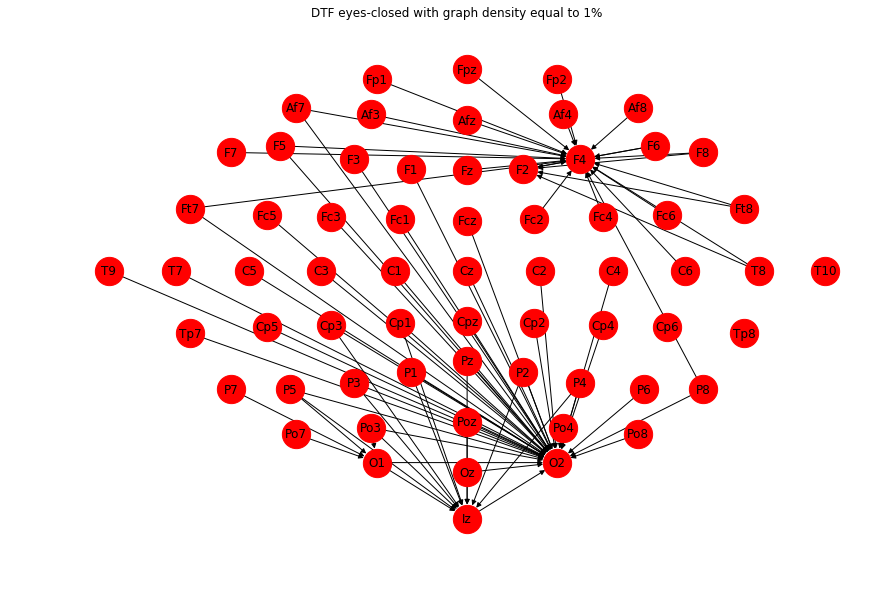

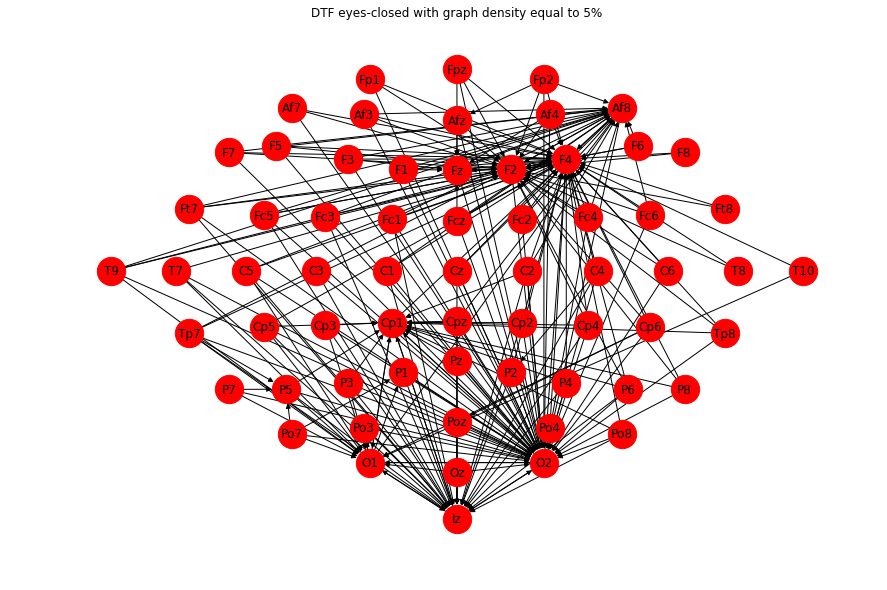

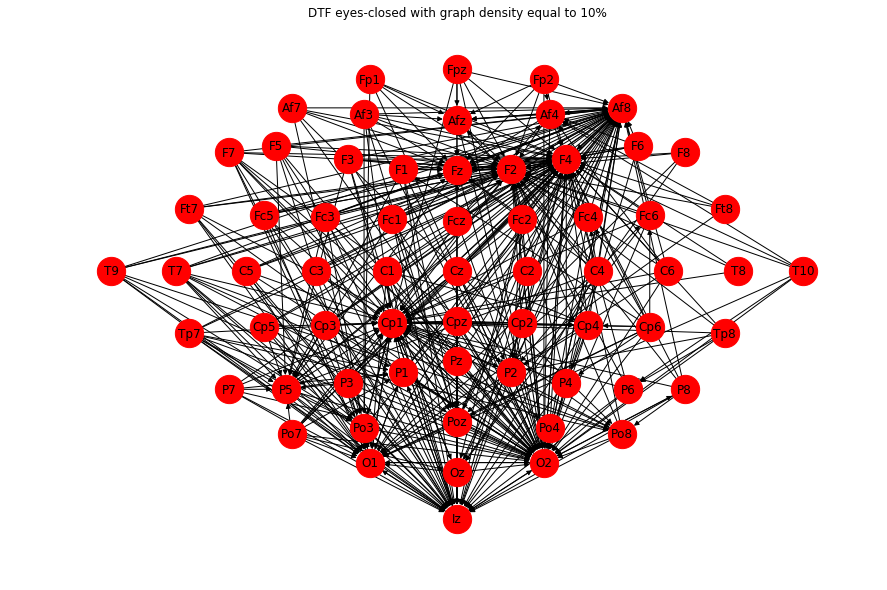

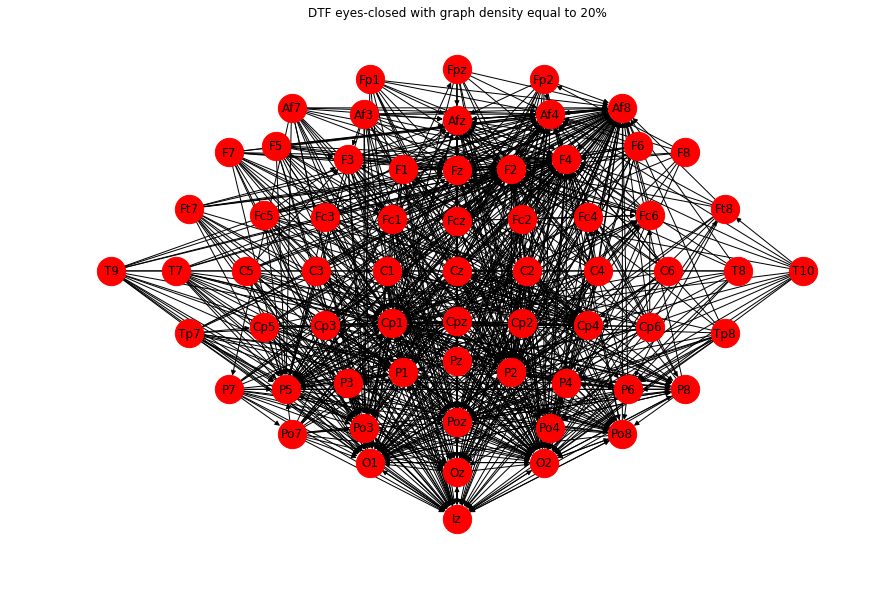

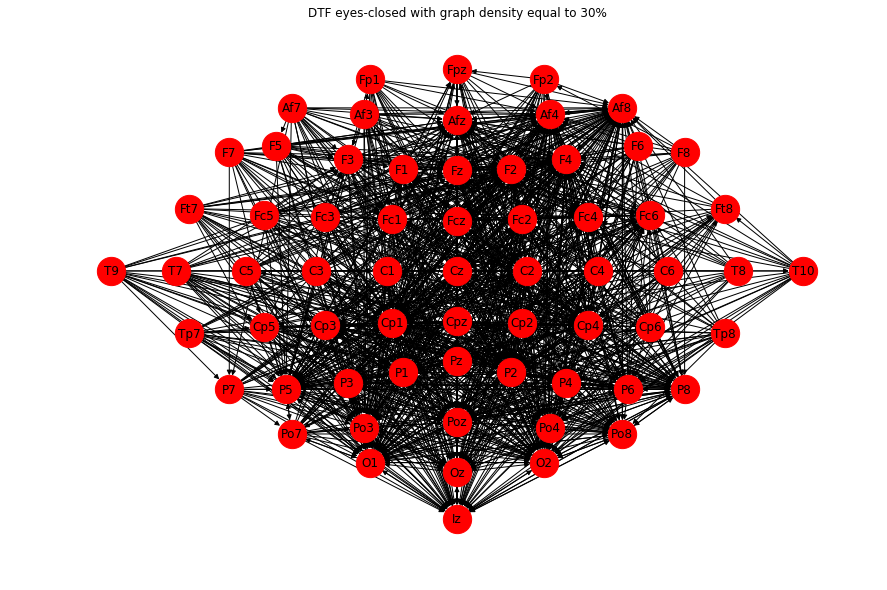

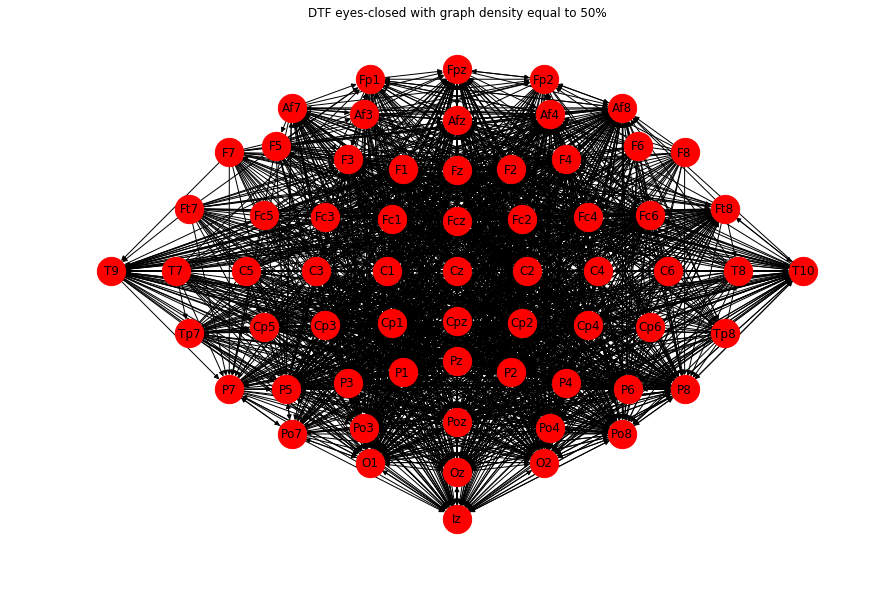

In [10]:
# Create a graphical representation of the binary adjacency matrices
EC_1.show_graph(dtf_Graph_EC_1, "DTF eyes-closed with graph density equal to 1%",
                locations,
                saving_path = "../../Images/Q1_3_DTF eyes-closed Density 1", save = True)
EC_5.show_graph(dtf_Graph_EC_5, "DTF eyes-closed with graph density equal to 5%",
                locations,
                saving_path = "../../Images/Q1_3_DTF eyes-closed Density 5", save = True)
EC_10.show_graph(dtf_Graph_EC_10, "DTF eyes-closed with graph density equal to 10%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-closed Density 10", save = True)
EC_20.show_graph(dtf_Graph_EC_20, "DTF eyes-closed with graph density equal to 20%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-closed Density 20", save = True)
EC_30.show_graph(dtf_Graph_EC_30, "DTF eyes-closed with graph density equal to 30%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-closed Density 30", save = True)
EC_50.show_graph(dtf_Graph_EC_50, "DTF eyes-closed with graph density equal to 50%",
                 locations,
                 saving_path = "../../Images/Q1_3_DTF eyes-closed Density 50", save = True)

In [11]:
# Let's save the classes on the disck in order to resuse them in further questions
with open("../Pickle/EO_1_13.file", "wb") as f:
    pickle.dump(EO_1, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EO_5_13.file", "wb") as f:
    pickle.dump(EO_5, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EO_10_13.file", "wb") as f:
    pickle.dump(EO_10, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EO_20_13.file", "wb") as f:
    pickle.dump(EO_20, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EO_30_13.file", "wb") as f:
    pickle.dump(EO_30, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EO_50_13.file", "wb") as f:
    pickle.dump(EO_50, f, pickle.HIGHEST_PROTOCOL)
f.close()

with open("../Pickle/EC_1_13.file", "wb") as f:
    pickle.dump(EC_1, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_5_13.file", "wb") as f:
    pickle.dump(EC_5, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_10_13.file", "wb") as f:
    pickle.dump(EC_10, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_20_13.file", "wb") as f:
    pickle.dump(EC_20, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_30_13.file", "wb") as f:
    pickle.dump(EC_30, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_50_13.file", "wb") as f:
    pickle.dump(EC_50, f, pickle.HIGHEST_PROTOCOL)
f.close()